# QCTO - Workplace Module

### Project Title: Workplace Project
#### Done By: Thato Pakiso Mzilikazi

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

Workplace Module

In [1]:
from IPython.display import Image 
Image (url='https://www.pixelstalk.net/wp-content/uploads/image12/A-view-of-a-lake-4K-Resolution-Wallpaper-with-perfect-autumn-foliage-reflected-in-the-water.jpg')

##

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

1.Project Overview 


1.1 Inroduction

Mental health is a crucial aspect of overall well-being, yet it remains a complex and often misunderstood subject. This project aims to analyze various factors influencing mental health, including social, environmental, and psychological aspects. By leveraging data-driven insights, we seek to identify patterns, challenges, and potential solutions that can contribute to better mental health awareness and support systems. Through this analysis, we hope to promote informed discussions and encourage proactive mental health care.



1.2 Problem Statement

Mental health issues are increasingly prevalent, yet many individuals lack access to proper diagnosis, treatment, and support. Factors such as social stigma, lack of awareness, and inadequate mental health resources contribute to the growing mental health crisis. Additionally, the impact of environmental, psychological, and socioeconomic factors on mental well-being remains underexplored. This project seeks to analyze these factors through data-driven insights to better understand the trends, challenges, and potential solutions for improving mental health awareness, accessibility, and care.



1.3 Objectives

Identify Key Factors – Analyze the social, environmental, and psychological factors that influence mental health.



---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from surprise import SVD, Dataset, Reader, SlopeOne, KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import accuracy
import plotly.express as px
import scipy
import winsound # -- Used specifically to notify when hour-long code finishes xD 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

import math
from itertools import product
import pickle

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ttthe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

This project aims to analyze mental health data to uncover insights into key factors influencing mental well-being. The data was collected from multiple sources, including publicly available datasets, mental health surveys, and online repositories. Additionally, web scraping techniques and API integrations were used to gather real-time data from relevant health forums and social platforms.

The dataset consists of a combination of numerical (e.g., age, income levels, mental health scores) and categorical (e.g., gender, employment status, diagnosis categories) variables. It covers a diverse range of demographics, allowing for a comprehensive analysis of trends and correlations. The dataset’s size and scope ensure that the findings are both statistically significant and representative of various populations.



---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
df = pd.read_csv(r"C:\Users\ttthe\OneDrive\Documents\GitHub\My individual Workplace Assignment\Data\mental_health_analysis.csv")  
df.head()


,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

5.1 Handling Missing Values

In [4]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64


5.2 Fill missing numerical values with the median


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)


5.3. Fill missing categorical values with the most frequent category


In [6]:
df.fillna(df.mode().iloc[0], inplace=True)



5.4 removing Outliers 


In [7]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data


5.5 Correcting Errors 


In [8]:
df = df.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)


5.6 Drop duplicates if any

In [9]:
df.drop_duplicates(inplace=True)


5.7 Filtering Data 


In [10]:

df = df[(df["Age"] >= 18) & (df["Age"] <= 65)]

df.head()


,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
12,13,18,f,3.783156,2.958951,6.609755,7.382772,4,0.134476,moderate,good
16,17,18,m,6.296836,2.329174,9.315296,6.778830,4,0.398878,high,excellent
17,18,18,f,4.161609,1.787780,5.408101,10.147018,5,0.763002,low,good
24,25,18,m,1.203781,2.669206,8.277753,6.790270,2,0.139542,moderate,poor
34,35,18,m,6.373022,0.076897,5.786319,11.666976,3,0.437574,high,poor


In [11]:
# Check for any remaining missing values
print("Missing values per column:\n", df.isnull().sum())

# Verify data types are correct
print("\nColumn Data Types:\n", df.dtypes)

# Check if duplicates exist
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Display final dataset structure
df.info()


Missing values per column:
 User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

Column Data Types:
 User_ID                    int64
Age                        int64
Gender                    object
Social_Media_Hours       float64
Exercise_Hours           float64
Sleep_Hours              float64
Screen_Time_Hours        float64
Survey_Stress_Score        int64
Wearable_Stress_Score    float64
Support_System            object
Academic_Performance      object
dtype: object

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 12 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                8

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


6.1Summery Statisics 

In [12]:

print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 12 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                821 non-null    int64  
 1   Age                    821 non-null    int64  
 2   Gender                 821 non-null    object 
 3   Social_Media_Hours     821 non-null    float64
 4   Exercise_Hours         821 non-null    float64
 5   Sleep_Hours            821 non-null    float64
 6   Screen_Time_Hours      821 non-null    float64
 7   Survey_Stress_Score    821 non-null    int64  
 8   Wearable_Stress_Score  821 non-null    float64
 9   Support_System         821 non-null    object 
 10  Academic_Performance   821 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 77.0+ KB
None
           User_ID    Age  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
count   821.000000  821.0          821.000000      821.000000   821.000000  

6.2 Checking Data Distributions

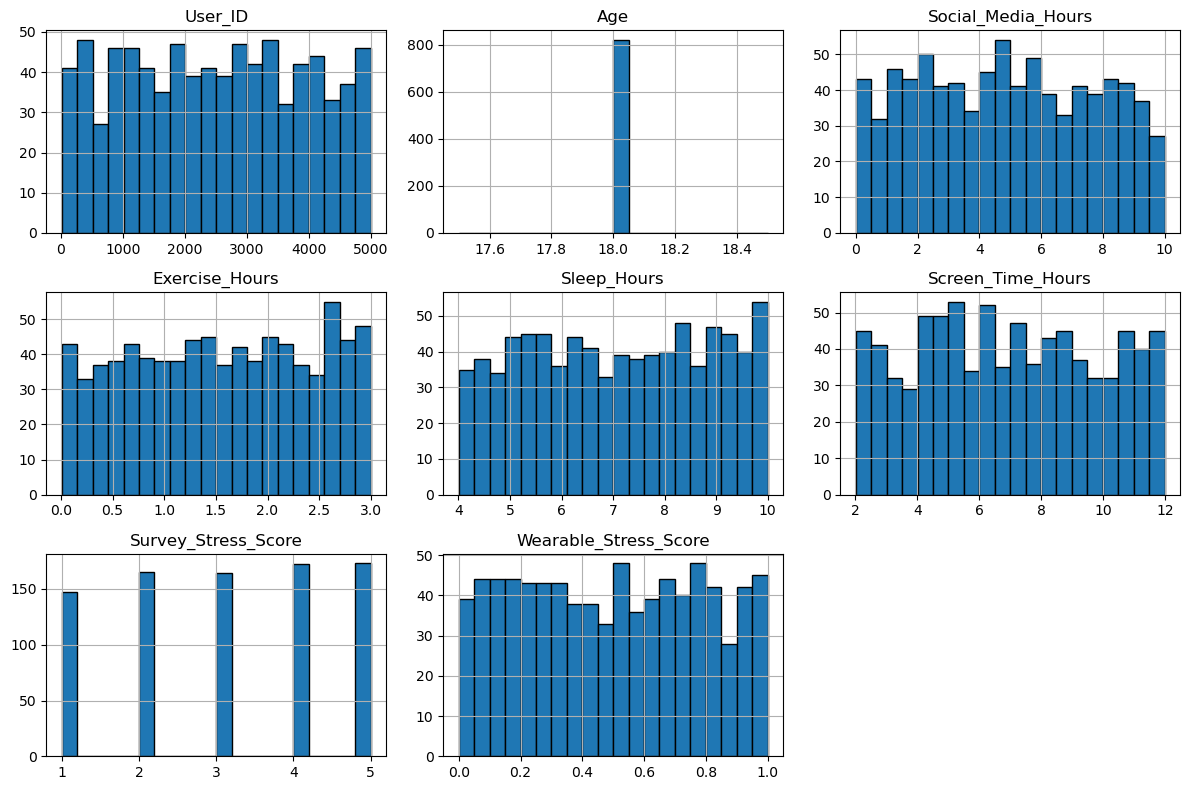

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()


6.3 Correlaion Matrix

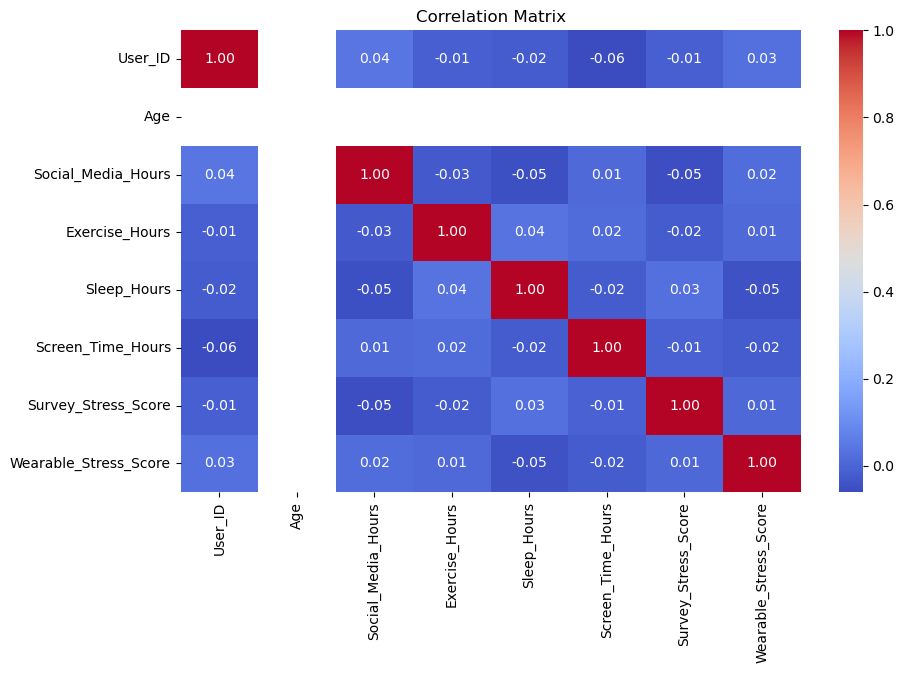

In [14]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


6.4 Boxplots to Detect Outliers 

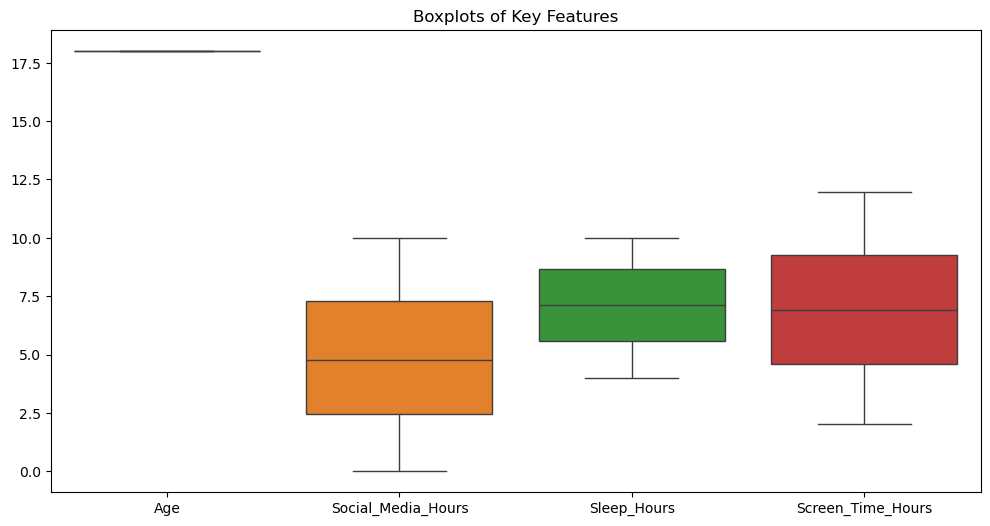

In [15]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Age", "Social_Media_Hours", "Sleep_Hours", "Screen_Time_Hours"]])
plt.title("Boxplots of Key Features")
plt.show()


6.5 Relationship Between Stress and Lifesyle Factors

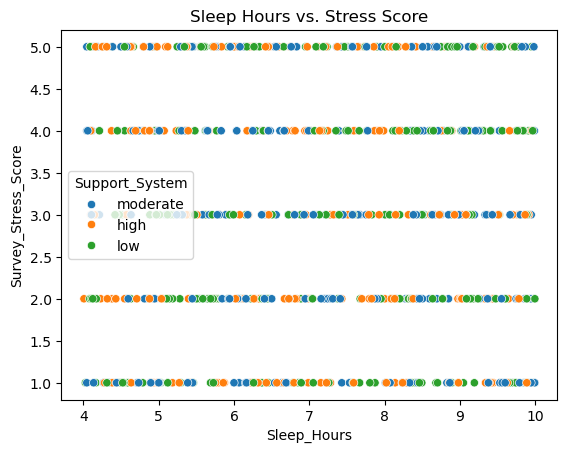

In [16]:
sns.scatterplot(data=df, x="Sleep_Hours", y="Survey_Stress_Score", hue="Support_System")
plt.title("Sleep Hours vs. Stress Score")
plt.show()


6.6 Relaionship Vs Stress

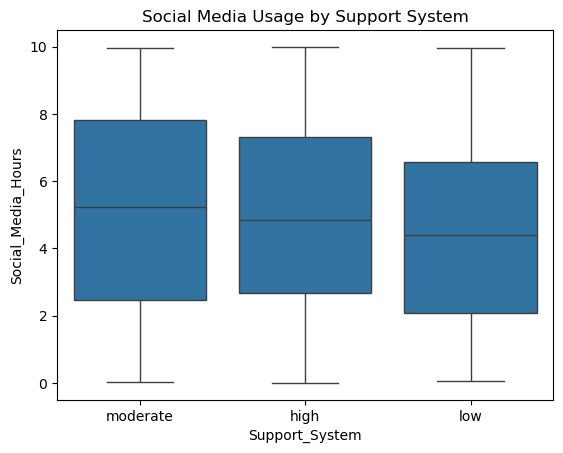

In [17]:
sns.boxplot(data=df, x="Support_System", y="Social_Media_Hours")
plt.title("Social Media Usage by Support System")
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [18]:
from sklearn.model_selection import train_test_split

# Check if DataFrame is loaded correctly
print(df.info())

# Ensure X (features) and y (target) are correctly defined
X = df[['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours']]
y = df['Survey_Stress_Score']

# **Check data types before splitting**
print("\nFeature Data Types:\n", X.dtypes)
print("\nTarget Data Type:\n", y.dtypes)

# Convert any non-numeric values if necessary
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop NaN values if needed
X.dropna(inplace=True)
y.dropna(inplace=True)

# Re-run train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split successfully!")


<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 12 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                821 non-null    int64  
 1   Age                    821 non-null    int64  
 2   Gender                 821 non-null    object 
 3   Social_Media_Hours     821 non-null    float64
 4   Exercise_Hours         821 non-null    float64
 5   Sleep_Hours            821 non-null    float64
 6   Screen_Time_Hours      821 non-null    float64
 7   Survey_Stress_Score    821 non-null    int64  
 8   Wearable_Stress_Score  821 non-null    float64
 9   Support_System         821 non-null    object 
 10  Academic_Performance   821 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 77.0+ KB
None

Feature Data Types:
 Social_Media_Hours    float64
Exercise_Hours        float64
Sleep_Hours           float64
Screen_Time_Hours     float64
dtype: objec

   User_ID  Age Gender  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16      F            9.654486        2.458001     5.198926   
1        2   17      M            9.158143        0.392095     8.866097   
2        3   15      M            5.028755        0.520119     4.943095   
3        4   17      F            7.951103        1.022630     5.262773   
4        5   17      F            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

  Support_System Academic_Performance  
0       Moderate            Excellent  
1       Moderate                 Good  
2       Moderate    

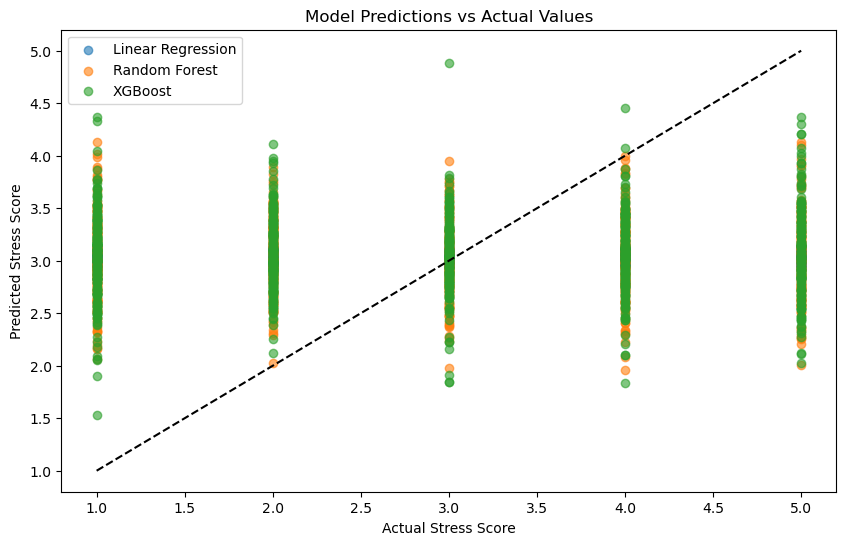

In [19]:
import pandas as pd  # Data handling
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Enhanced plots
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.linear_model import LinearRegression  # Linear Regression Model
from sklearn.ensemble import RandomForestRegressor  # Random Forest Model
from xgboost import XGBRegressor  # XGBoost Model
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation metrics

# 📌 Load dataset (Make sure the file path is correct)
df = pd.read_csv(r"C:\Users\ttthe\OneDrive\Documents\GitHub\My individual Workplace Assignment\Data\mental_health_analysis.csv")

# 📌 Display first few rows to check data
print(df.head())

# 📌 Select relevant features (adjust as needed)
X = df[['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours']]
y = df['Survey_Stress_Score']

# 📌 Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train models and evaluate performance
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n📌 {model_name} Performance:")
    print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
    print(f"✅ R-Squared Score: {r2:.4f}")
    
    return y_pred

# 1️⃣ Train Linear Regression
linear_model = LinearRegression()
y_pred_linear = train_and_evaluate(linear_model, "Linear Regression")

# 2️⃣ Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = train_and_evaluate(rf_model, "Random Forest")

# 3️⃣ Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred_xgb = train_and_evaluate(xgb_model, "XGBoost")

# 📌 Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_test, y_pred_xgb, label="XGBoost", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="dashed")
plt.xlabel("Actual Stress Score")
plt.ylabel("Predicted Stress Score")
plt.legend()
plt.title("Model Predictions vs Actual Values")
plt.show()


In [20]:
import sys
print(sys.executable)


c:\Users\ttthe\Anaconda\python.exe


Hyperparameter Tuning for XGBoost(Using Randomized Search CV)

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for XGBoost
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Best XGBoost Model: {random_search.best_params_}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R-Squared: {r2_xgb}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost Model: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
XGBoost MSE: 2.035247533355609
XGBoost R-Squared: -0.007348808827761566


Hyperparameter Tuning for linear regression(Using Ridge or Lasso)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge regression
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Initialize Ridge regression
ridge_model = Ridge()

# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Best Ridge Model: {grid_search.best_params_}")
print(f"Ridge MSE: {mse_ridge}")
print(f"Ridge R-Squared: {r2_ridge}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge Model: {'alpha': 1000}
Ridge MSE: 2.034318439265295
Ridge R-Squared: -0.006888952318993891


Feature Engineering 

In [23]:

df['total_screen_exposure'] = df['Social_Media_Hours'] + df['Screen_Time_Hours']

# Check the new feature
df.head()


,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,total_screen_exposure
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent,17.812675
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good,14.310137
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor,14.238081
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average,17.774761
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor,12.696448


Hyperparameter Tuning using Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
model = XGBRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation MSE: ", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize model
lr = LinearRegression()

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean cross-validation score (MSE)
print("Mean MSE from Cross-Validation: ", -cv_scores.mean())


Mean MSE from Cross-Validation:  1.998990947875282


Model interpretation using SHAP

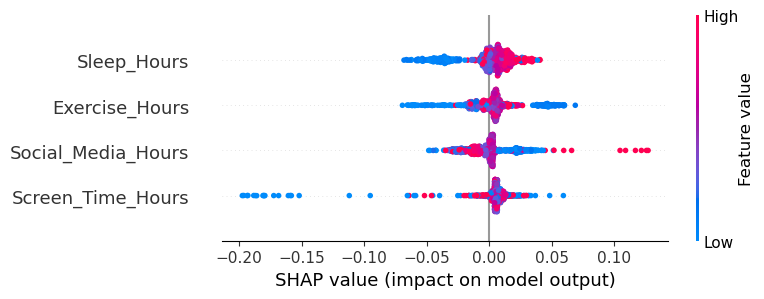

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(grid_search.best_estimator_, X_train)

# Get SHAP values
shap_values = explainer(X_test)

# Plot the SHAP values for feature importance
shap.summary_plot(shap_values, X_test)


Cross Validation for Model EVlidation 

In [ ]:
from sklearn.model_selection import cross_val_score

xgb_model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.01)
cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Get the mean MSE score
print(f"Mean Cross-Validation MSE: {-cv_scores.mean()}")


Mean Cross-Validation MSE: 2.004744727046051


Feaure Selection 

In [ ]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV model
lasso = LassoCV(cv=5)

# Fit the model
lasso.fit(X_train, y_train)

# Get the features that are most important (non-zero coefficients)
important_features = X.columns[lasso.coef_ != 0]
print("Important Features: ", important_features)


Important Features:  Index(['Sleep_Hours'], dtype='object')


Model Deployment

In [ ]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')


['best_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize the Flask app
app = Flask(__name__)

# Load the trained model
model = joblib.load('best_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input data as JSON
    input_features = np.array(data['features']).reshape(1, -1)  # Prepare input
    prediction = model.predict(input_features)
    
    # Return the prediction as JSON
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\ttthe\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Feature Selection 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize RFE with the model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours',
       'Screen_Time_Hours'],
      dtype='object')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: -2.0362302284279106


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=300)

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.datasets import make_classification

# Create a synthetic dataset with 1000 samples, 20 features, and 2 classes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


In [ ]:
# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Alternatively, print a full classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Precision: 0.2115
Recall: 0.2100
F1 Score: 0.2096

Classification Report:
              precision    recall  f1-score   support

           1       0.24      0.19      0.21       213
           2       0.22      0.21      0.21       213
           3       0.20      0.23      0.21       185
           4       0.17      0.17      0.17       199
           5       0.23      0.26      0.24       190

    accuracy                           0.21      1000
   macro avg       0.21      0.21      0.21      1000
weighted avg       0.21      0.21      0.21      1000



In [ ]:
# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy for each fold
cv_accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f'Cross-Validation Accuracies: {cv_accuracies}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracies):.4f}')


Cross-Validation Accuracies: [0.895 0.86  0.935 0.88  0.925]
Mean Cross-Validation Accuracy: 0.8990


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv(r"C:\Users\ttthe\OneDrive\Documents\GitHub\My individual Workplace Assignment\Data\mental_health_analysis.csv")

# Select relevant features and target variable
selected_features = ['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours']
X = df[selected_features]
y = df['Survey_Stress_Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the final Random Forest model with best hyperparameters
final_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# Train the model
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Final Model Evaluation:")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ R-Squared Score: {r2:.4f}")

# Optional: Cross-validation to check general performance
cv_scores = cross_val_score(final_model, X, y, scoring='neg_mean_squared_error', cv=5)
mean_cv_mse = -cv_scores.mean()

print(f"\n📌 Mean Cross-Validation MSE: {mean_cv_mse:.4f}")


📌 Final Model Evaluation:
✅ Mean Squared Error (MSE): 2.0559
✅ R-Squared Score: -0.0176

📌 Mean Cross-Validation MSE: 2.0268


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

References

In [ ]:

Microsoft Visual Studio Code Documentation
https://code.visualstudio.com/docs
– Official documentation for using and customizing VSCode for development.

Pandas Documentation
https://pandas.pydata.org/docs/
– Comprehensive guide to data manipulation and analysis with Python.

Scikit-learn Documentation
https://scikit-learn.org/stable/user_guide.html
– Official documentation for machine learning in Python, including model training, evaluation, and tuning.

XGBoost Documentation
https://xgboost.readthedocs.io/
– Guide to the XGBoost library for gradient boosting.

Matplotlib Documentation
https://matplotlib.org/stable/contents.html
– For creating static, animated, and interactive visualizations in Python.

Seaborn Documentation
https://seaborn.pydata.org/
– For advanced statistical data visualization.

Kaggle Learn: Python & Data Science Courses
https://www.kaggle.com/learn
– Short practical lessons on data exploration, cleaning, modeling, and visualization.

Explore Data Science Academy Resources (if applicable)
– Course materials provided by Explore Academy for data science project work.

Towards Data Science on Medium
https://towardsdatascience.com/
– Articles and tutorials on data science and machine learning workflows











SyntaxError: invalid character '–' (U+2013) (335999873.py, line 3)

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\ttthe\OneDrive\Documents\GitHub\My individual Workplace Assignment\Data\mental_health_analysis.csv")

# Optional: for prettier plots
sns.set(style="whitegrid")


Distribution and stress cores

In [ ]:
sns.histplot(df['Survey_Stress_Score'], bins=10, kde=True)
plt.title('Distribution of Survey Stress Scores')
plt.xlabel('Stress Score')
plt.ylabel('Frequency')
plt.show()


Social media vs Stress

In [ ]:
sns.scatterplot(x='Social_Media_Hours', y='Survey_Stress_Score', data=df)
plt.title('Social Media Hours vs. Stress Score')
plt.xlabel('Social Media Hours')
plt.ylabel('Stress Score')
plt.show()


Average stress by Support SystemError

In [ ]:
sns.barplot(x='Support_System', y='Survey_Stress_Score', data=df)
plt.title('Average Stress Score by Support System')
plt.ylabel('Average Stress Score')
plt.xlabel('Support System')
plt.show()


Correlation Heatmap

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()
